In [1]:
!pip install spotipy
!pip install pivottablejs


In [38]:
import spotipy
import requests
import spotipy.util as util
import pandas as pd
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui

In [33]:

CLIENT_ID = 'Spotify Credential.ipynb/CLIENT_ID'
CLIENT_SECRET = 'Spotify Credential.ipynb/CLIENT_SECRET'


AUTH_URL = 'https://accounts.spotify.com/api/token'

In [39]:
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [35]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
album_name = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2023', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        album_name.append(t['album']['name'])

In [36]:

track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id, 'album_name' : album_name})
print(track_df.shape)
track_df.head()

(1000, 6)


,artist_name,track_name,track_id,track_popularity,artist_id,album_name
0,PinkPantheress,Boy's a liar Pt. 2,6AQbmUe0Qwf5PZnt4HmTXv,95,78rUTD7y6Cy67W1RVzYs7t,Boy's a liar Pt. 2
1,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,5YGY8feqx7naU7z4HrwZM6,Flowers
2,Morgan Wallen,Last Night,59uQI0PADDKeE6UZDTJEe8,87,4oUHIQIBe0LHzYfvXNW4QM,3 Songs At A Time Sampler
3,The Weeknd,Die For You - Remix,7oDd86yk8itslrA9HRP2ki,94,1Xyo4u8uXC1ZmMpatF05PJ,Die For You (Remix)
4,Morgan Wallen,Last Night,7K3BhSpAxZBznislvUMVtn,81,4oUHIQIBe0LHzYfvXNW4QM,One Thing At A Time


In [7]:
len(track_df)

1000

In [8]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])  

In [9]:

track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,album_name,artist_popularity,artist_genres,artist_followers
0,PinkPantheress,Boy's a liar Pt. 2,6AQbmUe0Qwf5PZnt4HmTXv,95,78rUTD7y6Cy67W1RVzYs7t,Boy's a liar Pt. 2,86,[],1843782
1,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,5YGY8feqx7naU7z4HrwZM6,Flowers,93,[pop],20013675
2,Morgan Wallen,Last Night,59uQI0PADDKeE6UZDTJEe8,87,4oUHIQIBe0LHzYfvXNW4QM,3 Songs At A Time Sampler,94,[contemporary country],5214795
3,The Weeknd,Die For You - Remix,7oDd86yk8itslrA9HRP2ki,94,1Xyo4u8uXC1ZmMpatF05PJ,Die For You (Remix),99,"[canadian contemporary r&b, canadian pop, pop]",60625943
4,Morgan Wallen,Last Night,7K3BhSpAxZBznislvUMVtn,81,4oUHIQIBe0LHzYfvXNW4QM,One Thing At A Time,94,[contemporary country],5214795


In [10]:
track_features = []
for t_id in track_df['track_id']:
    af = sp.audio_features(t_id)
    track_features.append(af)
print(pd.DataFrame(track_features))

                                                     0
0    {'danceability': 0.696, 'energy': 0.809, 'key'...
1    {'danceability': 0.707, 'energy': 0.681, 'key'...
2    {'danceability': 0.517, 'energy': 0.675, 'key'...
3    {'danceability': 0.531, 'energy': 0.525, 'key'...
4    {'danceability': 0.492, 'energy': 0.675, 'key'...
..                                                 ...
995  {'danceability': 0.928, 'energy': 0.468, 'key'...
996  {'danceability': 0.758, 'energy': 0.786, 'key'...
997  {'danceability': 0.816, 'energy': 0.955, 'key'...
998  {'danceability': 0.622, 'energy': 0.257, 'key'...
999  {'danceability': 0.622, 'energy': 0.257, 'key'...

[1000 rows x 1 columns]


In [11]:
len(track_features)

1000

In [12]:
print(track_features[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [13]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [14]:
for element in track_features:
  for feat in element:
    tf_df.loc[len(tf_df)] = feat
print(tf_df)
#tf_df = pd.concat([feat,tf_df], ignore_index= True)

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.696   0.809    5    -8.254     1       0.0500        0.2520   
1           0.707   0.681    0    -4.325     1       0.0668        0.0632   
2           0.517   0.675    6    -5.382     1       0.0357        0.4590   
3           0.531   0.525    1    -6.500     0       0.0671        0.2320   
4           0.492   0.675    6    -5.456     1       0.0389        0.4670   
..            ...     ...  ...       ...   ...          ...           ...   
995         0.928   0.468    2    -8.196     1       0.3640        0.3280   
996         0.758   0.786    0    -4.847     1       0.0928        0.1670   
997         0.816   0.955    1    -1.732     1       0.3600        0.0828   
998         0.622   0.257    0    -9.811     1       0.0293        0.4780   
999         0.622   0.257    0    -9.811     1       0.0293        0.4780   

     instrumentalness  liveness  valence    tempo            type  \
0     

In [15]:

tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.696,0.809,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4
1,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
2,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4
3,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,audio_features,7oDd86yk8itslrA9HRP2ki,spotify:track:7oDd86yk8itslrA9HRP2ki,https://api.spotify.com/v1/tracks/7oDd86yk8its...,https://api.spotify.com/v1/audio-analysis/7oDd...,232857,4
4,0.492,0.675,6,-5.456,1,0.0389,0.4670,0.000000,0.1420,0.478,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4


In [16]:
len(tf_df)

1000

In [17]:

tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
#cols_to_drop1 = ['track_id','artist_id']
#cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
#track_df = track_df.drop(columns=cols_to_drop1)
#tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   album_name         1000 non-null   object
 6   artist_popularity  1000 non-null   int64 
 7   artist_genres      1000 non-null   object
 8   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   key               1000 

In [18]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   album_name         1000 non-null   object
 6   artist_popularity  1000 non-null   int64 
 7   artist_genres      1000 non-null   object
 8   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(2), string(4)
memory usage: 70.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   key     

# MOST POPULAR ARTIST/TRACK/ALBUM

In [19]:
list(track_df)

['artist_name',
 'track_name',
 'track_id',
 'track_popularity',
 'artist_id',
 'album_name',
 'artist_popularity',
 'artist_genres',
 'artist_followers']

In [20]:
#Top 20 popular songs/artist/album
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name', 'album_name']].head(20)
     

,track_name,artist_name,album_name
1,Flowers,Miley Cyrus,Flowers
16,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53"
0,Boy's a liar Pt. 2,PinkPantheress,Boy's a liar Pt. 2
3,Die For You - Remix,The Weeknd,Die For You (Remix)
13,TQG,KAROL G,MAÑANA SERÁ BONITO
19,OMG,NewJeans,NewJeans 'OMG'
47,PRC,Peso Pluma,PRC
278,Tormenta (feat. Bad Bunny),Gorillaz,Cracker Island
2,Last Night,Morgan Wallen,3 Songs At A Time Sampler
125,Fin de Semana,Oscar Maydon,Fin de Semana


In [21]:

by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres','artist_id']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres,artist_id
352,110409920,93,Ed Sheeran,"['pop', 'uk pop']",6eUKZXaKkcviH0Ku9w2n3V
850,77653248,90,Billie Eilish,"['art pop', 'electropop', 'pop']",6qqNVTkY8uBg9cP3Jd7DAH
433,70542988,92,Justin Bieber,"['canadian pop', 'pop']",1uNFoZAHBGtllmzznpCI3s
134,69634772,99,Taylor Swift,['pop'],06HL4z0CvFAxyc27GXpf02
60,65999740,100,Bad Bunny,"['reggaeton', 'trap latino', 'urbano latino']",4q3ewBCX7sLwd24euuV69X
144,60625943,99,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",1Xyo4u8uXC1ZmMpatF05PJ
666,46911748,91,Bruno Mars,"['dance pop', 'pop']",0du5cEVh5yTK9QJze8zA0C
617,46290965,91,Imagine Dragons,"['modern rock', 'rock']",53XhwfbYqKCa1cC15pYq2q
756,42516193,91,Coldplay,"['permanent wave', 'pop']",4gzpq5DPGxSnKTe4SA8HAU
991,40770901,89,XXXTENTACION,"['emo rap', 'miami hip hop']",15UsOTVnJzReFVN1VCnxy4


In [42]:
pivot_ui(track_df)

In [23]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)


pop                          684
canadian pop                 223
dance pop                    187
canadian contemporary r&b    173
uk pop                       124
art pop                       85
contemporary country          84
rap                           75
edm                           69
electropop                    67
pop dance                     67
big room                      65
trap                          63
melodic rap                   61
urbano latino                 54
philly rap                    49
reggaeton                     42
reggaeton colombiano          39
modern rock                   37
rock                          36
dtype: int64

Text(0.5, 1.0, 'Top genres')

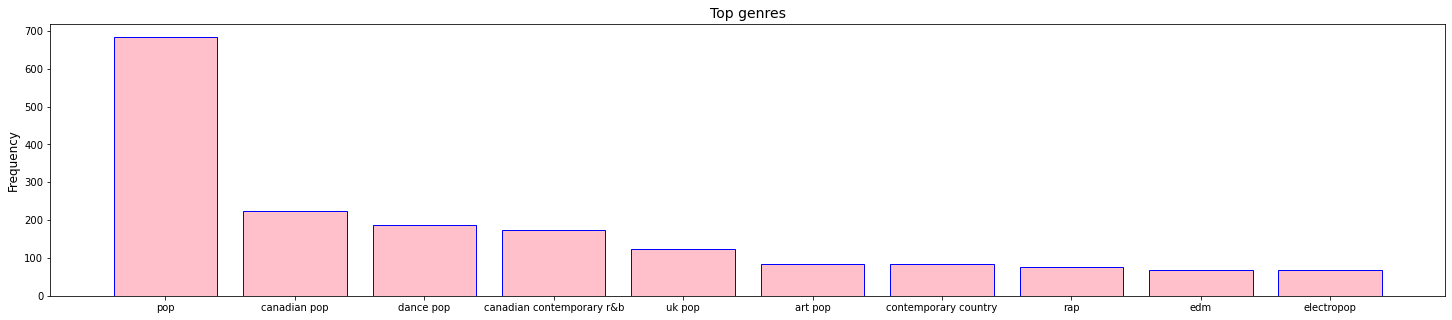

In [24]:
fig, ax = plt.subplots(figsize = (25,5))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10], 
       color='pink', edgecolor='blue')
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [25]:
#Top 20 artists by followers for each Top 10 genres
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
    for index, row in by_art_fol.iterrows():
        if genre in row['artist_genres']:
            top_artists_by_genre.append({'artist_name': row['artist_name'], 'artist_genre':genre})
            break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Justin Bieber,canadian pop
2,Bruno Mars,dance pop
3,The Weeknd,canadian contemporary r&b
4,Ed Sheeran,uk pop
5,Billie Eilish,art pop
6,Luke Combs,contemporary country
7,Post Malone,rap
8,Marshmello,edm
9,Billie Eilish,electropop


In [26]:
#Top 20 songs by top song by Genre

by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Flowers,100,Miley Cyrus,pop
1,Die For You - Remix,94,The Weeknd,canadian pop
2,Heaven,85,Niall Horan,dance pop
3,Die For You - Remix,94,The Weeknd,canadian contemporary r&b
4,Unholy (feat. Kim Petras),84,Sam Smith,uk pop
5,A&W,81,Lana Del Rey,art pop
6,Last Night,87,Morgan Wallen,contemporary country
7,Watch This - ARIZONATEARS Pluggnb Remix,86,Lil Uzi Vert,rap
8,El Merengue,80,Marshmello,edm
9,Die 4 Me,79,Halsey,electropop


In [43]:
pivot_ui(pd.DataFrame(top_songs_by_genre))

# Track recommendations

In [40]:
#Get a list of genres available for the recommendation function
genre = sp.recommendation_genre_seeds()
print(genre)

{'genres': ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep'

In [41]:
recommendations = sp.recommendations(seed_artists=[artist['id']], seed_genres=["pop"], seed_tracks=None, limit=10)
for track in recommendations['tracks']:
  print(track['artists'][0]['name'], track['name'])

Arcángel Sigues Con El
El Taiger Me Kemaste
J Balvin Morado
Pedro Capó Calma - Remix
Daddy Yankee LA HORA Y EL DÍA
Chyno Miranda El Peor
Manuel Turizo Una Lady Como Tú
Liam Payne Familiar (With J. Balvin)
DJ Snake Enjoy Enjaami - Spotify Singles (with Dhee feat. Arivu & Santhosh Narayanan)
Garmiani BARRACA (feat. MC Pikachu)


# Write to CSV files

In [30]:
#track_df.to_csv('spotify_track_df.csv', mode ='a', index=False, header= True)

In [31]:
#tf_df.to_csv('track_features_df.csv', mode ='a', index=False, header= True)